In [1]:
import pandas as pd
import psycopg2
from psycopg2 import OperationalError

def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection


def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except OperationalError as e:
        print(f"The error '{e}' occurred")


connection = create_connection(
    'postgres', 'postgres', 'postgres', '5.35.13.12', '5432'
)

select_clim = "SELECT * FROM alex.climat_geo"
clims = execute_read_query(connection, select_clim)

col_names = ['subject', 'city', 'lat', 'Ing', 'id']
df = pd.DataFrame(clims, columns = col_names)
df.head(5)

Connection to PostgreSQL DB successful


,subject,city,lat,Ing,id
0,Кабардино-Балкарская Республика,город Нальчик,43.485259,43.607081,2
1,Иркутская область,п Усть-Ордынский,52.805121,104.753641,3
2,Иркутская область,Тулун,54.55712,100.578047,4
3,Иркутская область,Тайшет,55.940502,98.002982,5
4,Иркутская область,п Слюдянка,57.97442,112.769605,6


In [2]:
def make_df(name:str):
    select_table = f"SELECT * FROM cbr.{name}"
    table = execute_read_query(connection,  select_table)
    cols_expr = f"SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS where TABLE_NAME = '{name}' and table_schema = 'cbr'"
    cols = execute_read_query(connection, cols_expr)
    cols = tup_to_list(cols)
    df = pd.DataFrame(table, columns = cols)
    return df



def tup_to_list(cols):
    new_cols = []
    for col in cols:
        new_cols.append(col[0])
    return new_cols

# поле period по дате

In [187]:
def data_to_period(data):
    month = (prognoz.date.str[0:2:1])
    year = (prognoz.date.str[5:7:1])
    return year + '.' + month

In [3]:
# realty_unique
prognoz = make_df('prognoz')
prognoz.head(5)

,type_expenses,direction_expenses,date,sum,period,lng,lat,climat_id
0,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,02:2022,None,None,None,None,None
1,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,03:2022,None,None,None,None,None
2,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,04:2022,None,None,None,None,None
3,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,05:2022,None,None,None,None,None
4,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,06:2022,None,None,None,None,None


In [190]:
prognoz['period'] = data_to_period(prognoz.date)
prognoz.head(2)

,type_expenses,direction_expenses,date,sum,period,lng,lat,climat_id
0,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,02:2022,None,22.02,None,None,None
1,Электроэнергия,134.1000.01 ДГУ. Оплата за электроэнергию по т...,03:2022,None,22.03,None,None,None


# Join по широте и долготе

In [ ]:
expen = make_df('expenses_2')
expen = expen[expen['sum'] != 'Отнесено']
expen['month'] = (expen.date.str[3:-5:1]).astype('int32')
expen.head(2)

In [130]:
# real_years
real_years = make_df('realty_list_year')
real_years.head(2)

,id,year,quarter,department,str_id,obj_info,name,address,reestr_code,built_year_col3,...,leased_by_bank_area_fourth_col18,transferred_by_bank_third_col19,transferred_by_bank_fourth_col20,carrying_amount_col21,revaluation_col22,accrued_amount_col23,residual_sum_col24,technical_condition_col25,test,object_id
0,4126,2018,1,Отделение Хабаровск,433,"Уличное освещение, 680054, Хабаровский край, г...",Уличное освещение,"680054, Хабаровский край, г. Хабаровск, Тихоок...",73-04-09-00-00-107,1995.0,...,0.00,0.00,0.00,69724.65,None,48632.92,21091.73,None,0,73-04-09-00-00-107
1,14329,2022,4,Отделение Южно-Сахалинск,139,"помещение, Российская Федерация, Сахалинская о...",помещение,"Российская Федерация, Сахалинская область, Кур...",59-01-01-015,1995.0,...,None,None,None,2653002.95,583175.92,1778184.60,874818.35,Хорошее,1,59-01-01-015


In [131]:
# realty_unique
real_unique = make_df('realty_uniq')
real_unique.head(2)

,id,reestr_code,department,name,address,region,area,city,ya_address,lng,lat,object_id,street,climat_id,img
0,32,04-02-01-021,Отделение Благовещенск,Квартира,"Российская Федерация, Амурская область, Городс...",Амурская область,городской округ Благовещенск,Благовещенск,"Россия, Амурская область, Благовещенск, улица ...",127.528754,50.259063,04-02-01-021,"улица Шевченко, 9",16,None
1,34,04-03-01-00-02-040(комп.),Отделение Благовещенск,Врачебный здравпункт административного (пристр...,"675000, Амурская область, г.Благовещенск, Свят...",Амурская область,городской округ Благовещенск,Благовещенск,"Россия, Амурская область, Благовещенск, переул...",127.524694,50.26029,04-03-01-00-02-040,"переулок Святителя Иннокентия, 17",16,None


In [132]:
real_years.columns

Index(['id', 'year', 'quarter', 'department', 'str_id', 'obj_info', 'name',
       'address', 'reestr_code', 'built_year_col3', 'balance_accept_date_col4',
       'total_area_col5', 'total_area_building_col6', 'bank_area_col7',
       'free_area_col8', 'leased_out_by_bank_area_col9',
       'leased_by_bank_area_col10', 'leased_by_bank_area_second_col11',
       'transferred_by_bank_col12', 'transferred_by_bank_second_col13',
       'bank_area_second_col14', 'free_area_second_col15',
       'leased_out_by_bank_area_col16', 'leased_by_bank_area_third_col17',
       'leased_by_bank_area_fourth_col18', 'transferred_by_bank_third_col19',
       'transferred_by_bank_fourth_col20', 'carrying_amount_col21',
       'revaluation_col22', 'accrued_amount_col23', 'residual_sum_col24',
       'technical_condition_col25', 'test', 'object_id'],
      dtype='object')

In [133]:
reals_merged = pd.merge(real_years, real_unique,
                     left_on = 'object_id',
                     right_on = 'object_id')

In [134]:
reals_merged.columns

Index(['id_x', 'year', 'quarter', 'department_x', 'str_id', 'obj_info',
       'name_x', 'address_x', 'reestr_code_x', 'built_year_col3',
       'balance_accept_date_col4', 'total_area_col5',
       'total_area_building_col6', 'bank_area_col7', 'free_area_col8',
       'leased_out_by_bank_area_col9', 'leased_by_bank_area_col10',
       'leased_by_bank_area_second_col11', 'transferred_by_bank_col12',
       'transferred_by_bank_second_col13', 'bank_area_second_col14',
       'free_area_second_col15', 'leased_out_by_bank_area_col16',
       'leased_by_bank_area_third_col17', 'leased_by_bank_area_fourth_col18',
       'transferred_by_bank_third_col19', 'transferred_by_bank_fourth_col20',
       'carrying_amount_col21', 'revaluation_col22', 'accrued_amount_col23',
       'residual_sum_col24', 'technical_condition_col25', 'test', 'object_id',
       'id_y', 'reestr_code_y', 'department_y', 'name_y', 'address_y',
       'region', 'area', 'city', 'ya_address', 'lng', 'lat', 'street',
       '

In [135]:
expen.columns

Index(['year', 'smeta', 'departament', 'code', 'code_expenses',
       'name_expenses', 'direction_expenses', 'sum_begin', 'sum', 'sum_endda',
       'date', 'adress', 'id', 'object_id', 'lng', 'lat', 'type_expenses',
       'month'],
      dtype='object')

In [136]:
#real_years[real_years.object_id.notna()].object_id.unique()
real_years[real_years.id == '4126']
real_years.id

0         4126
1        14329
2        14331
3        14332
4        14333
         ...  
11737    13818
11738    14215
11739    14299
11740    14393
11741    14394
Name: id, Length: 11742, dtype: int64

In [137]:
real_unique.object_id

0             04-02-01-021
1       04-03-01-00-02-040
2       04-03-01-00-54-057
3       04-03-01-00-54-064
4             04-05-01-018
               ...        
1109    58-04-01-00-00-074
1110    24-04-09-00-00-068
1111    73-04-09-00-00-103
1112    73-03-01-00-07-069
1113          51-01-03-184
Name: object_id, Length: 1114, dtype: object

In [138]:
expen.smeta[0]

'Смета РКЦ Ленск Отделения - Национального банка по Республике Саха (Якутия) Дальневосточного ГУ Банка России'

In [139]:
df = pd.merge(reals_merged, expen,
        left_on = ['lng','lat'],
        right_on = ['lng','lat'])

In [142]:
df[['lng', 'lat']]
df['lng'] = df.lng.astype('float32')
df['lat'] = df.lat.astype('float32')
df[(df.lng == 135.071917) & (df.lat == 48.480228)].shape

(105, 64)

In [146]:
df = df.rename(columns = {'sum':'target'})
df['target'] = df['target'].astype('string')
df['target'] = (df.target.str.replace(',', '.')).astype('float32')

# Catboost

In [318]:
numerical_features = ['built_year_col3', 'lng','lat','month','total_area_col5', 'total_area_building_col6']
categorical_features = ['department_x',
 'leased_out_by_bank_area_col9',
 'leased_by_bank_area_col10',
 'leased_by_bank_area_second_col11',
 'transferred_by_bank_second_col13',
 'leased_out_by_bank_area_col16',
 'leased_by_bank_area_third_col17',
 'leased_by_bank_area_fourth_col18',
 'transferred_by_bank_fourth_col20',
 'technical_condition_col25',
 'department_y',
 'region',
 'area',
 'city',
 'img',
 'smeta',
 'departament',
 'code',
 'code_expenses',
 'name_expenses',
 'type_expenses']
text_features = []
feature_names  = numerical_features + categorical_features + text_features

In [319]:
X_ctb = df.drop('target', axis=1)
y_ctb = df.target

In [320]:
'''categorical_features = []
text_columns = []
for col in X_ctb.columns:
    if X_ctb[col].dtype != 'int64' and X_ctb[col].dtype != 'float64' and X_ctb[col].dtype != 'float32' and X_ctb[col].dtype != 'int32':
        if X_ctb[col].nunique() > 50:
            text_columns.append(col)
        else:
            categorical_features .append(col)
'''
#print(X_ctb[col].nunique(), X_ctb[col].dtype)

"categorical_features = []\ntext_columns = []\nfor col in X_ctb.columns:\n    if X_ctb[col].dtype != 'int64' and X_ctb[col].dtype != 'float64' and X_ctb[col].dtype != 'float32' and X_ctb[col].dtype != 'int32':\n        if X_ctb[col].nunique() > 50:\n            text_columns.append(col)\n        else:\n            categorical_features .append(col)\n"

In [321]:
X_ctb[text_columns] = X_ctb[text_columns].fillna('None')
X_ctb[categorical_features] = X_ctb[categorical_features].fillna('None')

In [323]:
for col in categorical_features:
    X_ctb[col] = X_ctb[col].astype('string')

In [324]:
for col in text_columns:
    X_ctb[col] = X_ctb[col].astype('string')

In [334]:
X_ctb['total_area_col5'] = X_ctb['total_area_col5'].astype('float32')
X_ctb['total_area_building_col6'] = X_ctb['total_area_building_col6'].astype('float32')

In [335]:
from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X_ctb[categorical_features + numerical_features], y_ctb, random_state=42)
#categorical_features = ['type_expenses']
feature_names = list(X_tr.columns)
#['obj_info', 'name_x', 'addres_x', 'address_y']

# ЕСТЬ DATA LEAK, можно попробовать взять real_uears.groupby([lot, ...]).sum()

## Catboost

In [415]:
from catboost import Pool, CatBoostRegressor
import numpy as np
#numerical_features = []
#text_columns = []
#categorical_features = []
#feature_names = numerical_features + categorical_features 


train_pool = Pool(X_tr,
                  y_tr,
                  cat_features=categorical_features,
                  text_features=text_columns,
                  feature_names=feature_names
                  )

test_pool = Pool(X_test,
                 y_test,
                 cat_features=categorical_features,
                 text_features=text_columns,
                 feature_names=feature_names
                 )

eval_set = [(X_test, y_test)]

ctb = CatBoostRegressor(iterations=10,
                              #depth = 10,
                              loss_function='MAPE',
                              verbose=1,
                              random_state=42,
                              eval_metric='MAPE',
                              nan_mode='Min',
                              ) 

ctb.fit(train_pool,
              verbose=1,
              early_stopping_rounds=20,
              eval_set=eval_set
              )

y_pred = ctb.predict(X_test)

0:	learn: 0.9775216	test: 0.9786745	best: 0.9786745 (0)	total: 133ms	remaining: 1.2s
1:	learn: 0.9753107	test: 0.9764546	best: 0.9764546 (1)	total: 232ms	remaining: 930ms
2:	learn: 0.9733999	test: 0.9745729	best: 0.9745729 (2)	total: 402ms	remaining: 939ms
3:	learn: 0.9707945	test: 0.9719821	best: 0.9719821 (3)	total: 543ms	remaining: 815ms
4:	learn: 0.9687197	test: 0.9698957	best: 0.9698957 (4)	total: 643ms	remaining: 643ms
5:	learn: 0.9671371	test: 0.9683627	best: 0.9683627 (5)	total: 744ms	remaining: 496ms
6:	learn: 0.9655565	test: 0.9668212	best: 0.9668212 (6)	total: 836ms	remaining: 358ms
7:	learn: 0.9642273	test: 0.9655796	best: 0.9655796 (7)	total: 962ms	remaining: 241ms
8:	learn: 0.9629865	test: 0.9643813	best: 0.9643813 (8)	total: 1.06s	remaining: 117ms
9:	learn: 0.9618689	test: 0.9633283	best: 0.9633283 (9)	total: 1.21s	remaining: 0us

bestTest = 0.9633283034
bestIteration = 9



In [355]:
ctb.get_best_score()

{'learn': {'MAPE': 0.876961864075427},
 'validation': {'MAPE': 0.8766448569246169}}

In [356]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, ctb.predict(X_test) * 3)

1.0768455398002401

In [182]:
import matplotlib.pyplot as plt
(y_test).describe()


count    7.902100e+04
mean     4.023001e+04
std      1.335461e+05
min     -5.878904e+05
25%      2.133200e+02
50%      1.232980e+03
75%      8.877070e+03
max      1.279217e+06
Name: target, dtype: float64

In [ ]:
X_tr.columns[15]

In [ ]:
X_tr['balance_accept_date_col4'].loc[46490]

In [ ]:
for col in text_columns:
    X_ctb[col] = X_ctb[col].fillna('None', inplace=True)


In [ ]:
text_columns

In [ ]:
categorical_features[14]


In [353]:
feature_imp = pd.Series(ctb.get_feature_importance(),
                     X_tr.columns)
feature_imp

department_x                         0.000000
leased_out_by_bank_area_col9         0.000000
leased_by_bank_area_col10            0.000000
leased_by_bank_area_second_col11     0.000000
transferred_by_bank_second_col13     0.000000
leased_out_by_bank_area_col16        0.000000
leased_by_bank_area_third_col17      0.000000
leased_by_bank_area_fourth_col18     0.000000
transferred_by_bank_fourth_col20     0.000000
technical_condition_col25            0.000000
department_y                         0.000000
region                               8.982591
area                                 0.000000
city                                 0.000000
img                                  0.000000
smeta                                0.000000
departament                          0.000000
code                                25.332948
code_expenses                        0.000000
name_expenses                        0.000000
type_expenses                        0.000000
built_year_col3                   

<AxesSubplot: >

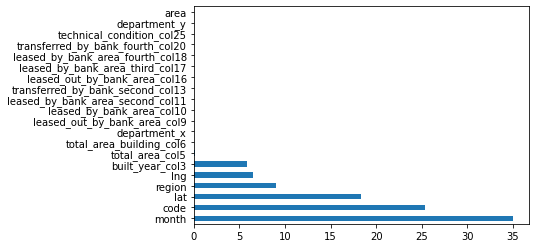

In [354]:
feature_imp.nlargest(20).plot(kind='barh')

In [211]:
#reals_merged['lng'] = reals_merged.lng.astype('float32')
#reals_merged['lat'] = reals_merged.lat.astype('float32')
reals_merged[(reals_merged.lng ==135.071917) & (reals_merged.lat == 48.480229)]['year']

Index(['id_x', 'year', 'quarter', 'department_x', 'str_id', 'obj_info',
       'name_x', 'address_x', 'reestr_code_x', 'built_year_col3',
       'balance_accept_date_col4', 'total_area_col5',
       'total_area_building_col6', 'bank_area_col7', 'free_area_col8',
       'leased_out_by_bank_area_col9', 'leased_by_bank_area_col10',
       'leased_by_bank_area_second_col11', 'transferred_by_bank_col12',
       'transferred_by_bank_second_col13', 'bank_area_second_col14',
       'free_area_second_col15', 'leased_out_by_bank_area_col16',
       'leased_by_bank_area_third_col17', 'leased_by_bank_area_fourth_col18',
       'transferred_by_bank_third_col19', 'transferred_by_bank_fourth_col20',
       'carrying_amount_col21', 'revaluation_col22', 'accrued_amount_col23',
       'residual_sum_col24', 'technical_condition_col25', 'test', 'object_id',
       'id_y', 'reestr_code_y', 'department_y', 'name_y', 'address_y',
       'region', 'area', 'city', 'ya_address', 'lng', 'lat', 'street',
       '

In [212]:
reals_merged.shape

(11742, 48)

In [215]:
reals_merged.columns

Index(['id_x', 'year', 'quarter', 'department_x', 'str_id', 'obj_info',
       'name_x', 'address_x', 'reestr_code_x', 'built_year_col3',
       'balance_accept_date_col4', 'total_area_col5',
       'total_area_building_col6', 'bank_area_col7', 'free_area_col8',
       'leased_out_by_bank_area_col9', 'leased_by_bank_area_col10',
       'leased_by_bank_area_second_col11', 'transferred_by_bank_col12',
       'transferred_by_bank_second_col13', 'bank_area_second_col14',
       'free_area_second_col15', 'leased_out_by_bank_area_col16',
       'leased_by_bank_area_third_col17', 'leased_by_bank_area_fourth_col18',
       'transferred_by_bank_third_col19', 'transferred_by_bank_fourth_col20',
       'carrying_amount_col21', 'revaluation_col22', 'accrued_amount_col23',
       'residual_sum_col24', 'technical_condition_col25', 'test', 'object_id',
       'id_y', 'reestr_code_y', 'department_y', 'name_y', 'address_y',
       'region', 'area', 'city', 'ya_address', 'lng', 'lat', 'street',
       '

In [216]:
real_years.columns

Index(['id', 'year', 'quarter', 'department', 'str_id', 'obj_info', 'name',
       'address', 'reestr_code', 'built_year_col3', 'balance_accept_date_col4',
       'total_area_col5', 'total_area_building_col6', 'bank_area_col7',
       'free_area_col8', 'leased_out_by_bank_area_col9',
       'leased_by_bank_area_col10', 'leased_by_bank_area_second_col11',
       'transferred_by_bank_col12', 'transferred_by_bank_second_col13',
       'bank_area_second_col14', 'free_area_second_col15',
       'leased_out_by_bank_area_col16', 'leased_by_bank_area_third_col17',
       'leased_by_bank_area_fourth_col18', 'transferred_by_bank_third_col19',
       'transferred_by_bank_fourth_col20', 'carrying_amount_col21',
       'revaluation_col22', 'accrued_amount_col23', 'residual_sum_col24',
       'technical_condition_col25', 'test', 'object_id'],
      dtype='object')

In [220]:
'total_area_col5', 'total_area_building_col6'

['department_x',
 'leased_out_by_bank_area_col9',
 'leased_by_bank_area_col10',
 'leased_by_bank_area_second_col11',
 'transferred_by_bank_second_col13',
 'leased_out_by_bank_area_col16',
 'leased_by_bank_area_third_col17',
 'leased_by_bank_area_fourth_col18',
 'transferred_by_bank_fourth_col20',
 'technical_condition_col25',
 'department_y',
 'region',
 'area',
 'city',
 'img',
 'smeta',
 'departament',
 'code',
 'code_expenses',
 'name_expenses',
 'sum_begin',
 'id',
 'object_id_y',
 'type_expenses']

In [350]:
X_ctb.shape

(316082, 63)

In [361]:
reals_merged[['lng', 'lat']]

,lng,lat
0,135.071915,48.480228
1,135.071915,48.480228
2,135.071915,48.480228
3,135.071915,48.480228
4,147.873825,45.231762
...,...,...
11737,128.864273,71.635658
11738,128.864273,71.635658
11739,125.392456,58.606583
11740,125.392456,58.606583


In [411]:
reals_merged.groupby(['lng', 'lat', 'year', 'quarter']).sum()[['total_area_col5', 'total_area_building_col6']]

total_area_col5 total_area_building_col6
lng         lat       year quarter                                         
-179.119843 66.321968 2016 1                141.30                   141.30
                           2                141.30                   141.30
                           3                141.30                   141.30
                           4                141.30                   141.30
                      2017 1                141.30                   141.30
...                                            ...                      ...
 179.357666 63.063507 2022 3                513.00                   513.00
                           4                 513.0                        0
                      2023 1                 513.0                        0
                           2                 513.0                        0
                           3                 513.0                        0

[4471 rows x 2 columns]

In [380]:
real_unique[(real_unique.lng == 135.071915) & (real_unique.lat == 48.480228)].shape

(8, 15)

In [377]:
real_unique['lng'] = real_unique.lng.astype('float32')
real_unique['lat'] = real_unique.lat.astype('float32')

In [421]:
X_tr.columns

Index(['department_x', 'leased_out_by_bank_area_col9',
       'leased_by_bank_area_col10', 'leased_by_bank_area_second_col11',
       'transferred_by_bank_second_col13', 'leased_out_by_bank_area_col16',
       'leased_by_bank_area_third_col17', 'leased_by_bank_area_fourth_col18',
       'transferred_by_bank_fourth_col20', 'technical_condition_col25',
       'department_y', 'region', 'area', 'city', 'img', 'smeta', 'departament',
       'code', 'code_expenses', 'name_expenses', 'type_expenses',
       'built_year_col3', 'lng', 'lat', 'month', 'total_area_col5',
       'total_area_building_col6'],
      dtype='object')

In [426]:
X_tr[numerical_features] = X_tr[numerical_features].isna().sum().fillna(0)

C:\Users\Geforce\AppData\Local\Temp\ipykernel_28436\555273431.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_tr[numerical_features] = X_tr[numerical_features].isna().sum().fillna(0)


# KNN

In [440]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_tr[numerical_features], y_tr)

C:\Users\Geforce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Geforce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Geforce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

KNeighborsRegressor(n_neighbors=2)

In [441]:
X_test[numerical_features] = X_test[numerical_features].isna().sum().fillna(0)
pred = knn.predict(X_test[numerical_features])

C:\Users\Geforce\AppData\Local\Temp\ipykernel_28436\1402574955.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X_test[numerical_features] = X_test[numerical_features].isna().sum().fillna(0)
C:\Users\Geforce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Geforce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a futu

In [431]:
# 5 neighb
mean_absolute_percentage_error(y_test, pred)

41.04929

In [442]:
# 2 neighb
mean_absolute_percentage_error(y_test, pred)

20.998976

In [439]:
# 1 neighb
mean_absolute_percentage_error(y_test, pred)

43.279003